In [ ]:

import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/All About Google Devices - Sheet1.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/All About Google Devices - Sheet1.csv')
#f.head()
df['Device'].nunique

<bound method IndexOpsMixin.nunique of 0                        Pixel Phones
1                         Chromebooks
2                    Google Assistant
3                        Nest Devices
4                         Google Home
                    ...              
992         Pixel Phones & Durability
993         Pixel Buds & Pixel Phones
994    Nest Devices & Climate Control
995       Pixel Phones & Productivity
996           Pixel Watch & Wellbeing
Name: Device, Length: 997, dtype: object>

In [ ]:
print("Unique Value Counts for 'Device' column:")
print(df['Device'].value_counts())


Unique Value Counts for 'Device' column:
Google Assistant & Nest Devices    69
Google Wifi                        51
Pixel Fold                         48
Pixel Phones                       47
Nest Devices & Security            47
                                   ..
Chromebooks & Travel                1
Pixel Phones & Home Care            1
Pixel Phones & Arts & Culture       1
Nest Devices & Smart Home           1
Pixel Phones & Home Improvement     1
Name: Device, Length: 132, dtype: int64


In [ ]:
print("Total duplicate rows:\n")
print(df.duplicated().sum())
df = df.drop_duplicates(ignore_index = True)


Total duplicate rows:

0


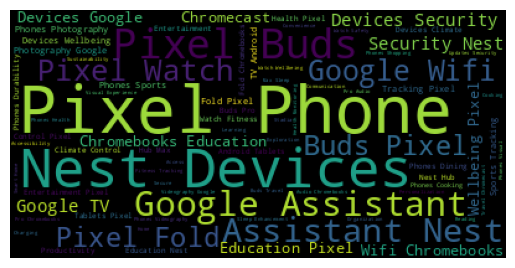

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as mso


# WordCloud: => Device

SEED = 123

all_text_device = " ".join(df['Device'])

wc = WordCloud(stopwords = STOPWORDS, random_state = SEED).generate(all_text_device)

plt.imshow(wc)
plt.axis("off")
plt.show()

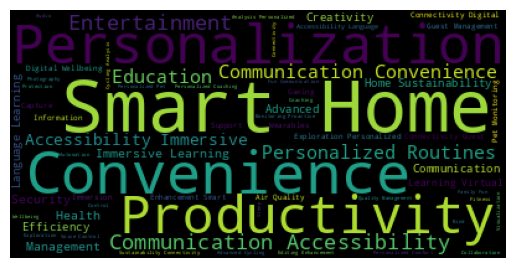

In [ ]:
# WordCloud: => Category

all_text_category = " ".join(df['Category'])

wc = WordCloud(stopwords = STOPWORDS, random_state = SEED).generate(all_text_category)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
X = df.drop('Category', axis = 1)
y = df[['Category']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = SEED)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_target_train = TfidfVectorizer()
features_target_train = vectorizer_target_train.fit_transform(y_train['Category'].values)
features_target_train = features_target_train.toarray()
features_target_train.shape

(697, 320)

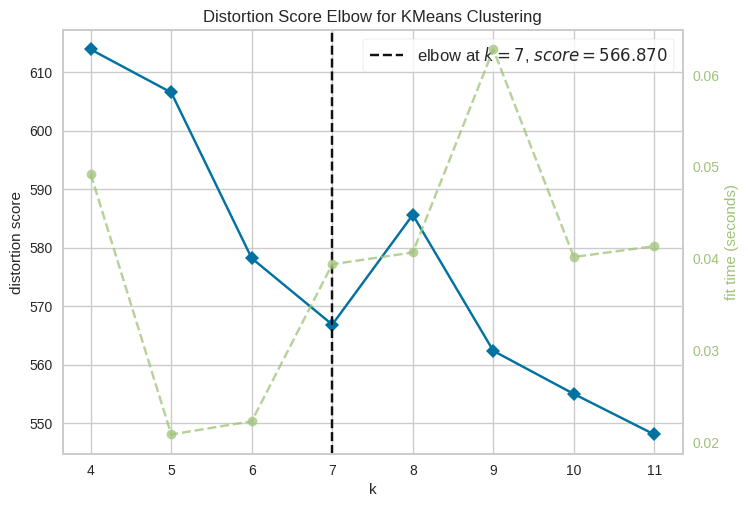

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# We define the cluster and evaluate the possible optimal number using the elbow method.

model = KMeans(n_init = 1, random_state = SEED)
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(features_target_train)
visualizer.show()

In [ ]:
import spacy
# Load english language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Let's create a function to preprocess the text of each row.
def preprocess(txt:str):

    doc = nlp(txt.lower())
    tokens_filtrered = list()

    for token in doc:
        if token.is_stop or token.is_punct:
            continue

        tokens_filtrered.append(token.lemma_)

    return " ".join(tokens_filtrered)

In [ ]:
# We apply cleaning to the training objective variable.
y_train['Category'] = y_train['Category'].apply(preprocess)
y_train.head()

,Category
243,education immersion
756,proactive safety independent living
202,smart home appliance control
300,speed ai integration
568,personalize comfort sustainability


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# We finally create the k means model to assign the labels.
model_train_target = KMeans(n_init = 1, random_state = SEED, n_clusters = 7)
model_train_target.fit(features_target_train)

KMeans(n_clusters=7, n_init=1, random_state=123)

In [ ]:
y_train['Cluster'] = model_train_target.labels_
y_train.head()

,Category,Cluster
243,education immersion,5
756,proactive safety independent living,5
202,smart home appliance control,1
300,speed ai integration,5
568,personalize comfort sustainability,6


In [90]:
id2label = {0:'Education',
            1:'Others',
            2:'Personalize',
            3:'Connectivity',
            4:'Learning',
            5:'Smart Home',
            6:'Communication'}
#taken in consideration with word cloud
# Now we have to carry out the same steps for the independent variables(X_train).
# Device => X_train
X_train['Device'] = X_train['Device'].apply(preprocess)

X_train.head()

,Question,Device,Cluster_Device
243,How can I leverage Google Lens on my Pixel to ...,pixel phone art culture,0
756,Does the Google Pixel Watch offer built-in fal...,pixel watch safety,3
202,Can I use Google Assistant on my Nest Mini to ...,google assistant nest device,2
300,Does the Pixel 6a offer a Google Tensor chip f...,pixel phone processing power,0
568,Does the Nest Thermostat offer integration wit...,nest devices climate control,4


In [91]:
vectorizer_train_device = TfidfVectorizer()
features_train_device = vectorizer_train_device.fit_transform(X_train['Device'].values)
features_train_device = features_train_device.toarray()
features_train_device.shape

(697, 95)

In [119]:
model_train_device = KMeans(n_init = 1, random_state = SEED, n_clusters = 6)
model_train_device.fit(features_train_device)

KMeans(n_clusters=6, n_init=1, random_state=123)

In [94]:
X_train['Cluster_Device'] = model_train_device.labels_
X_train

,Question,Device,Cluster_Device
243,How can I leverage Google Lens on my Pixel to ...,pixel phone art culture,3
756,Does the Google Pixel Watch offer built-in fal...,pixel watch safety,3
202,Can I use Google Assistant on my Nest Mini to ...,google assistant nest device,4
300,Does the Pixel 6a offer a Google Tensor chip f...,pixel phone processing power,3
568,Does the Nest Thermostat offer integration wit...,nest devices climate control,2
...,...,...,...
988,"Does the Pixel 7 Pro offer a ""Night Sight"" mod...",pixel phone photography,3
322,Does the Nest Thermostat offer integration wit...,nest device wellbee,2
382,Does the Nest Thermostat offer integration wit...,nest devices smart home automation,2
365,Can I utilize Google Assistant on my Pixel Bud...,pixel bud productivity voice control,3


In [95]:
# Question => X_train
vectorizer_train_question = TfidfVectorizer()
features_train_question = vectorizer_train_question.fit_transform(X_train['Question'].values)
features_train_question = features_train_question.toarray()
features_train_question.shape

(697, 1950)

In [96]:
# Finally, we concatenate device and question
X_train_final = np.concatenate((features_train_question,
                                X_train['Cluster_Device'].values.reshape(-1,1)),
                               axis = 1)
X_train_final

array([[0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 4.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [99]:
y_test['Category'] = y_test['Category'].apply(preprocess)
features_target_test = vectorizer_target_train.transform(y_test['Category'].values)
features_target_test = features_target_test.toarray()
features_target_test.shape
pred_target_test = model_train_target.predict(features_target_test)
y_test['Cluster'] = pred_target_test
y_test.head()

,Category,Cluster
167,productivity home management,5
667,immersive learn virtual space travel,0
991,specialized translation medical information su...,5
982,education family fun,5
171,creative content creation,5


In [100]:
# X_test

X_test['Device'] = X_test['Device'].apply(preprocess)

X_test.head()

,Question,Device
167,How can I use Google Lens on my Chromebook to ...,chromebook cooking
667,How can I utilize Google Earth VR on my Pixel ...,pixel phone education
991,How can I leverage Google Translate on my Chro...,chromebook education
982,Can I leverage the Chromecast with Google TV t...,chromecast google tv android tablet
171,Does the Pixel 7 Pro offer a cinematic video m...,pixel phone photography


In [101]:
features_test_device = vectorizer_train_device.transform(X_test['Device'].values)
features_test_device = features_test_device.toarray()
features_test_device.shape
pred_device_test = model_train_device.predict(features_test_device)
X_test['Cluster_Device'] =pred_device_test
X_test.head()

,Question,Device,Cluster_Device
167,How can I use Google Lens on my Chromebook to ...,chromebook cooking,5
667,How can I utilize Google Earth VR on my Pixel ...,pixel phone education,0
991,How can I leverage Google Translate on my Chro...,chromebook education,5
982,Can I leverage the Chromecast with Google TV t...,chromecast google tv android tablet,1
171,Does the Pixel 7 Pro offer a cinematic video m...,pixel phone photography,3


In [102]:
features_test_question = vectorizer_train_question.transform(X_test['Question'].values)
features_test_question = features_test_question.toarray()
features_test_question.shape

(300, 1950)

In [103]:
# Finally, we concatenate device and question.
X_test_final = np.concatenate((features_test_question,
                                X_test['Cluster_Device'].values.reshape(-1,1)),
                               axis = 1)
X_test_final

array([[0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 5.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [107]:
# Models
from catboost import CatBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state = SEED,
                        auto_class_weights ="Balanced",
                        verbose = 0)

cb.fit(X_train_final, y_train['Cluster'])

y_pred_train = cb.predict(X_train_final)
y_pred_test = cb.predict(X_test_final)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')

Accuracy Train: 0.9980
Accuracy Test: 0.8548


In [105]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [109]:
# Models
from xgboost import XGBClassifier


xgb = XGBClassifier(random_state=SEED, objective='multi:softmax', scale_pos_weight='balanced', verbosity=0)

xgb.fit(X_train_final, y_train['Cluster'])

y_pred_train = xgb.predict(X_train_final)
y_pred_test = xgb.predict(X_test_final)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')


Accuracy Train: 1.0000
Accuracy Test: 0.7988


In [110]:
# Models
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(random_state=SEED)

ridge.fit(X_train_final, y_train['Cluster'])

y_pred_train = ridge.predict(X_train_final)
y_pred_test = ridge.predict(X_test_final)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')


Accuracy Train: 0.9542
Accuracy Test: 0.8268


In [111]:
# Models
from sklearn.linear_model import LogisticRegression
# Instantiate the Logistic Regression model
logistic_reg = LogisticRegression(random_state=SEED, multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit on the training data
logistic_reg.fit(X_train_final, y_train['Cluster'])

# Make predictions on the training and test sets
y_pred_train = logistic_reg.predict(X_train_final)
y_pred_test = logistic_reg.predict(X_test_final)

# Accuracy
acc_train = accuracy_score(y_train['Cluster'], y_pred_train)
acc_test = accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {acc_train:.4f}')
print(f'Accuracy Test: {acc_test:.4f}')


Accuracy Train: 0.9311
Accuracy Test: 0.8600


In [112]:
# Models
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier model
random_forest = RandomForestClassifier(random_state=SEED, class_weight='balanced')

# Fit on the training data
random_forest.fit(X_train_final, y_train['Cluster'])

# Make predictions on the training and test sets
y_pred_train = random_forest.predict(X_train_final)
y_pred_test = random_forest.predict(X_test_final)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')


Accuracy Train: 1.0000
Accuracy Test: 0.7592


In [113]:
# Models
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=SEED, class_weight='balanced')

# Fit on the training data
decision_tree.fit(X_train_final, y_train['Cluster'])

# Make predictions on the training and test sets
y_pred_train = decision_tree.predict(X_train_final)
y_pred_test = decision_tree.predict(X_test_final)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')


Accuracy Train: 1.0000
Accuracy Test: 0.7602


In [114]:
# Models
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting Classifier model
gradient_boost = GradientBoostingClassifier(random_state=SEED)

# Fit on the training data
gradient_boost.fit(X_train_final, y_train['Cluster'])

# Make predictions on the training and test sets
y_pred_train = gradient_boost.predict(X_train_final)
y_pred_test = gradient_boost.predict(X_test_final)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')


Accuracy Train: 1.0000
Accuracy Test: 0.7960


In [115]:
# Models
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# Instantiate the MLP Classifier model
mlp_classifier = MLPClassifier(random_state=SEED, max_iter=500)

# Fit on the standardized training data
mlp_classifier.fit(X_train_scaled, y_train['Cluster'])

# Make predictions on the standardized training and test sets
y_pred_train = mlp_classifier.predict(X_train_scaled)
y_pred_test = mlp_classifier.predict(X_test_scaled)

# Balanced Accuracy
bal_acc_train = balanced_accuracy_score(y_train['Cluster'], y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test['Cluster'], y_pred_test)

print(f'Accuracy Train: {bal_acc_train:.4f}')
print(f'Accuracy Test: {bal_acc_test:.4f}')


Accuracy Train: 1.0000
Accuracy Test: 0.8323


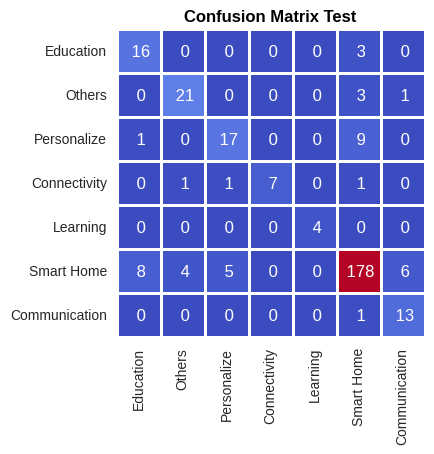

In [117]:
cf_mx = confusion_matrix(y_test['Cluster'], y_pred_test)

plt.figure(figsize = (9,4))
sns.heatmap(cf_mx, cmap = "coolwarm", annot = True, linewidths = 1.0, fmt = " ",
            cbar = False, square = True, xticklabels = id2label.values(),
            yticklabels = id2label.values())
plt.title("Confusion Matrix Test", fontsize = 12, fontweight = "bold", color ="black")
plt.show()